<a href="https://colab.research.google.com/github/venketeshai/edunet_project/blob/main/used_cars_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Used Car Price Prediction***

**Goal:** Predict selling_price of used cars using **regression**

loading the dataset

In [ ]:
import pandas as pd
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


Understanding the Data

In [ ]:
df.info()
df.describe()
df.columns
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


Dropping Unnecessary Columns

In [ ]:
df.drop(['name'], axis=1, inplace=True)


Encoding Categorical Columns

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,False,False,False,True,True,False,True,False,False,False,False
1,2007,135000,50000,False,False,False,True,True,False,True,False,False,False,False
2,2012,600000,100000,True,False,False,False,True,False,True,False,False,False,False
3,2017,250000,46000,False,False,False,True,True,False,True,False,False,False,False
4,2014,450000,141000,True,False,False,False,True,False,True,False,True,False,False


**Exploratory Data analysis**

In [ ]:
print("Dataset shape:", df.shape)
df.info()
df.describe()


Dataset shape: (4340, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Target Variable Distribution

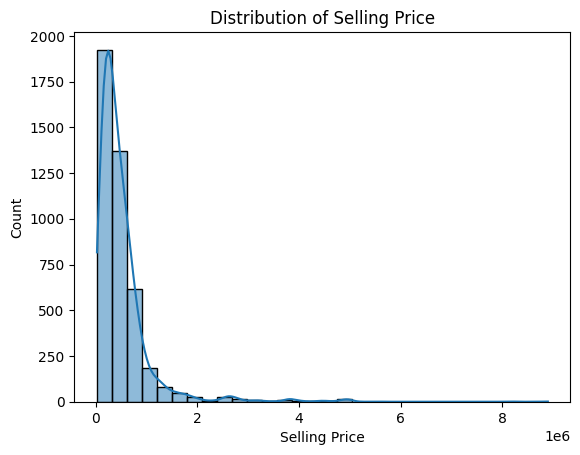

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.show()


Categorical Value Counts

In [ ]:
print(df['fuel'].value_counts())
print(df['seller_type'].value_counts())
print(df['transmission'].value_counts())
print(df['owner'].value_counts())


fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Year-wise Car Count

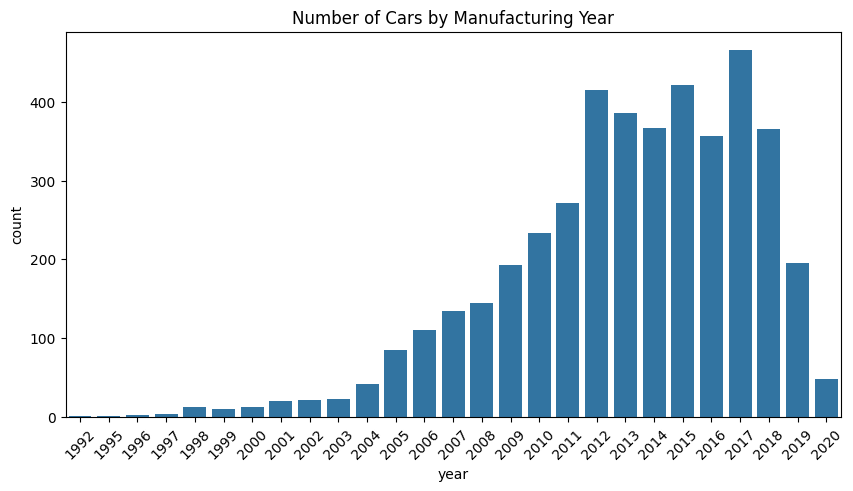

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='year', data=df, order=sorted(df['year'].unique()))
plt.xticks(rotation=45)
plt.title("Number of Cars by Manufacturing Year")
plt.show()


Correlation Heatmap

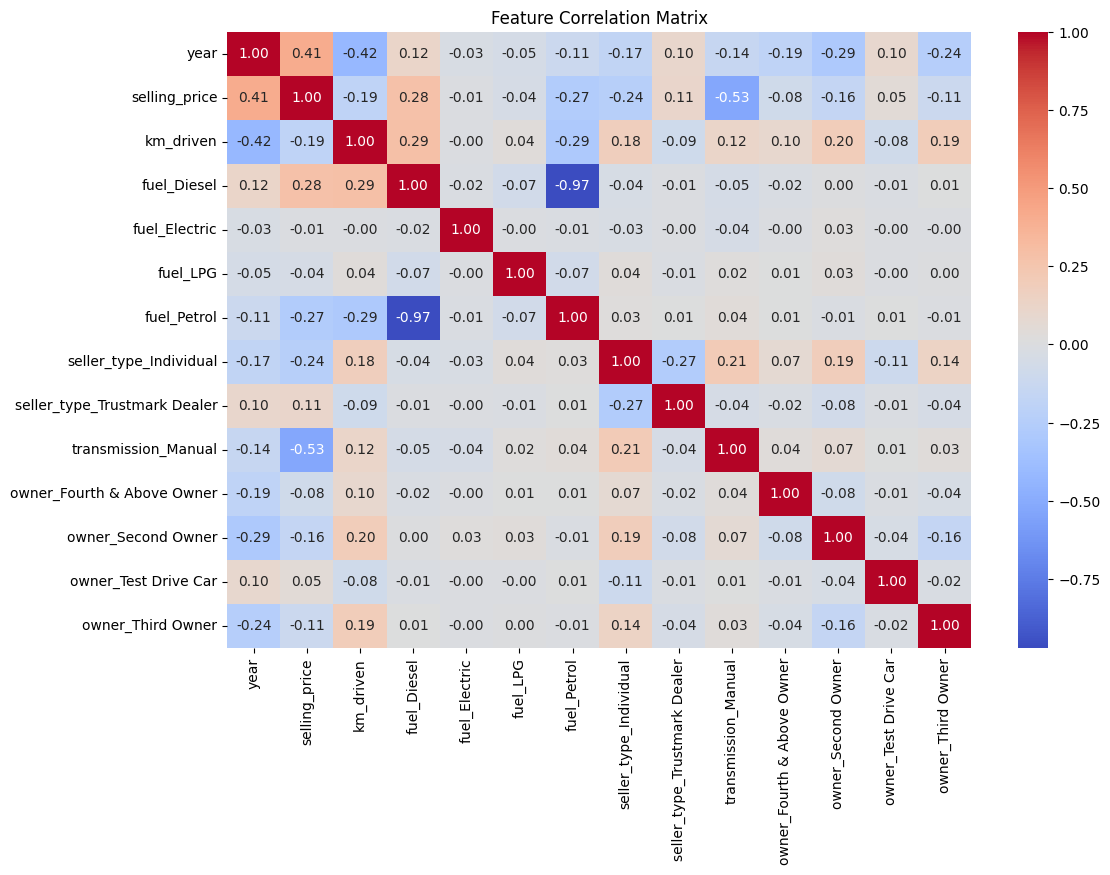

In [ ]:
import seaborn as sns
corr = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


Feature vs Target Analysis

Text(0.5, 1.0, 'KM Driven vs Selling Price')

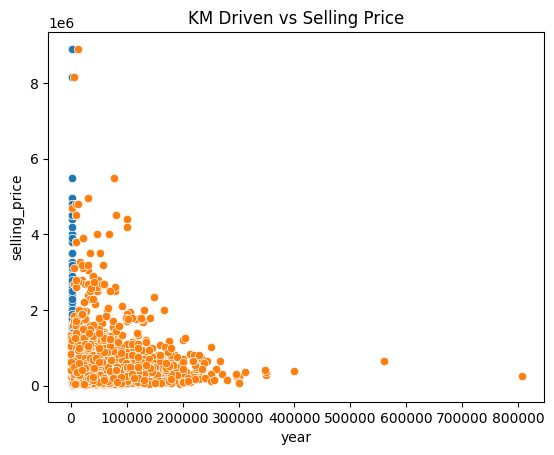

In [ ]:
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title("Year vs Selling Price")

sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title("KM Driven vs Selling Price")


<Axes: xlabel='fuel', ylabel='selling_price'>

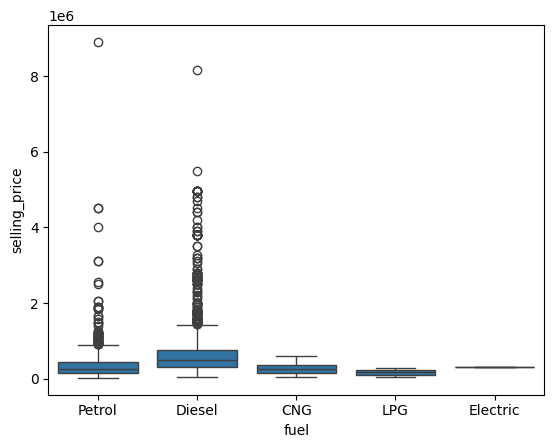

In [ ]:
sns.boxplot(x='fuel', y='selling_price', data=df)


Defining Features and Target

In [ ]:
X = df_encoded.drop("selling_price", axis=1)
y = df_encoded["selling_price"]


Training-Test Split
python


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Training a Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Making Predictions

In [ ]:
y_pred = model.predict(X_test)


Evaluating the Model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 221706.36930930178
MSE: 182146878750.28143
RMSE: 426786.68998725986
R² Score: 0.40313036014321024


Visualizing Predictions vs Actuals

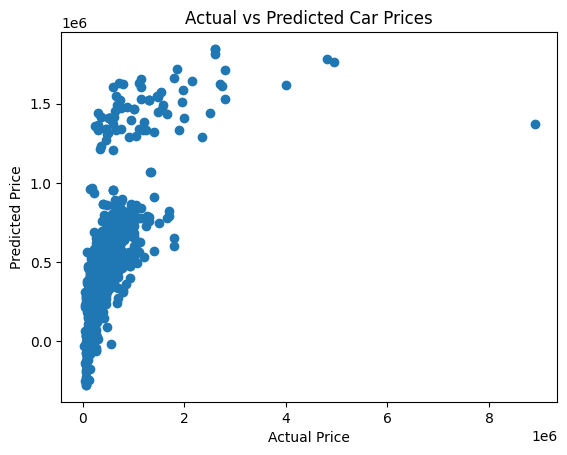

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


Predict for New Input

In [ ]:
sample_input = X_test.iloc[0].values.reshape(1, -1)
predicted_price = model.predict(sample_input)
print("Predicted Price:", predicted_price[0])


Predicted Price: 429791.44395394623


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Random Forest Regressor**

 Importing & Training the Mode

In [ ]:
import pandas as pd

df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.drop(['name'], axis=1, inplace=True)



Encoding Categorical Variables

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)


Defining Features and Target

In [ ]:
X = df_encoded.drop("selling_price", axis=1)
y = df_encoded["selling_price"]


Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Training Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

 Evaluation

In [ ]:
y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))


Random Forest MAE: 168994.44108928187
Random Forest MSE: 153687523105.2337
Random Forest RMSE: 392030.0028125828
Random Forest R² Score: 0.49638765596382106


**Other Regression models**

Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)


XGBoost Regressor

In [ ]:
!pip install xgboost
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


Lasso Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)


**Evaluating other Models**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{model_name} MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"{model_name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")


In [ ]:
evaluate_model(y_test, y_pred_tree, "Decision Tree")
evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_ridge, "Ridge")


Decision Tree R²: 0.329
Decision Tree MAE: 180811.02
Decision Tree RMSE: 452514.75
XGBoost R²: 0.504
XGBoost MAE: 167960.91
XGBoost RMSE: 389154.02
Ridge R²: 0.403
Ridge MAE: 221656.02
Ridge RMSE: 426707.96


**Result**

🔍 Model Evaluation:
Mean Absolute Error (MAE): ₹168655.50
Root Mean Squared Error (RMSE): ₹393729.21
R² Score: 0.4920


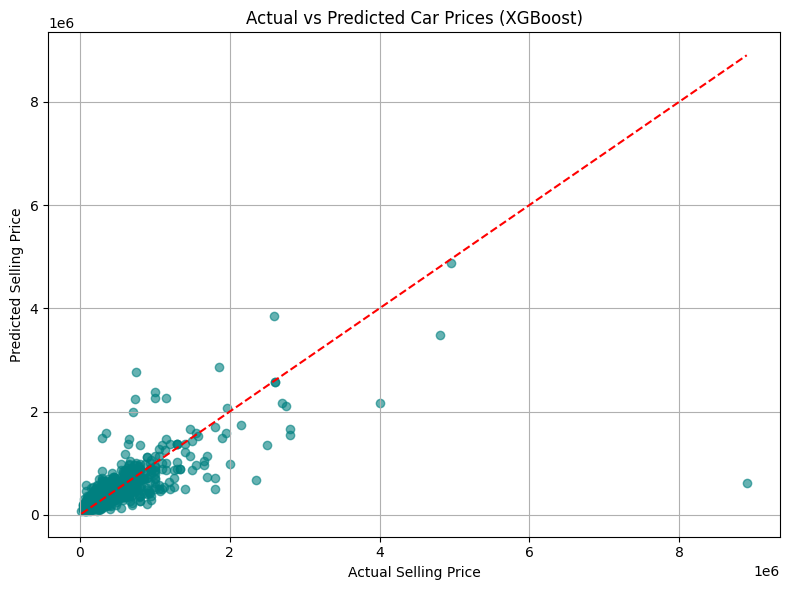

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Train XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print("🔍 Model Evaluation:")
print("Mean Absolute Error (MAE): ₹{:.2f}".format(mae))
print("Root Mean Squared Error (RMSE): ₹{:.2f}".format(rmse))
print("R² Score: {:.4f}".format(r2))

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices (XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()
